In [1]:
import pandas as pd

In [3]:
import requests
from bs4 import BeautifulSoup

# URL of the Wikipedia page
url = 'https://en.wikipedia.org/wiki/List_of_stadiums_in_the_United_Kingdom_by_capacity'

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table', {'class': 'wikitable'})

df = pd.read_html(str(table))[0]


/Users/kyle/syp-crime-py/.venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/var/folders/hx/466vc2k14r73fv002gsbg1nr0000gn/T/ipykernel_3185/1885861824.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


In [4]:
df.sample(10)

,Stadium,Capacity,Location,Country,Club/Team,Sport,Image
34,Bet365 Stadium,30183,Stoke-on-Trent,England,Stoke City F.C.,Association football,NaN
9,Etihad Stadium,"60,000[10]",Manchester,England,Manchester City F.C.,"2002 Commonwealth Games, association football",NaN
176,Falkirk Stadium,7937,Falkirk,Scotland,Falkirk F.C.,Association football,NaN
150,Colchester Community Stadium,10000,Colchester,England,Colchester United F.C.,Association football,NaN
101,Parc y Scarlets,14870,Llanelli,Wales,"Scarlets, Llanelli RFC, Llanelli A.F.C.*","Rugby union, association football",NaN
209,Seaview,6500,Belfast,Northern Ireland,Crusaders F.C.,Association football,NaN
135,Cwmbran Stadium,10500,Cwmbran,Wales,Cwmbran Town A.F.C.,"Athletics, association football",NaN
250,The Grange,5000,Edinburgh,Scotland,Scotland national cricket team,Cricket,NaN
122,Rodney Parade,11676,Newport,Wales,"Newport RFC, Dragons Newport County FC","Rugby union, association football",NaN
28,Casement Park,32000,Belfast,Northern Ireland,Antrim GAA,"Hurling, camogie, Gaelic football",NaN


In [5]:
df.dtypes

Stadium       object
Capacity      object
Location      object
Country       object
Club/Team     object
Sport         object
Image        float64
dtype: object

In [6]:
df.to_csv('wiki-stadiums.csv')

# Option 1
Use Geopy to scrape the data

# Option 2
Use a Google sheets plug in to handle the small dataset (Chosen method)

In [2]:
geo_df = pd.read_csv('wiki-stadiums-geocode.csv')

In [3]:
geo_df.sample(10)

,Unnamed: 0,Stadium,Capacity,Location,Country,Full Address,Latitude,Longitude,Club/Team,Sport,Image
127,127,North Marine Road,11500,Scarborough,England,North Marine Road Scarborough England,54.288185,-0.402866,"Scarborough Cricket Club, Yorkshire County Cri...",Cricket,NaN
245,245,Gander Green Lane,5013,Sutton,England,Gander Green Lane Sutton England,51.370665,-0.207887,Sutton United F.C.,Association football,NaN
175,175,New Grosvenor Stadium,8000,Lisburn,Northern Ireland,New Grosvenor Stadium Lisburn Northern Ireland,54.536032,-6.003007,Lisburn Distillery F.C.,Association football,NaN
168,168,Palmerston Park,8690,Dumfries,Scotland,Palmerston Park Dumfries Scotland,55.070370,-3.624944,Queen of the South F.C.,Association football,NaN
45,45,Welford Road Stadium,25849,Leicester,England,Welford Road Stadium Leicester England,52.624167,-1.133056,Leicester Tigers,Rugby union,NaN
241,241,The New Lawn,5147,Nailsworth,England,The New Lawn Nailsworth England,51.699136,-2.236928,Forest Green Rovers F.C.,Association football,NaN
119,119,Salford City Stadium,12000,Salford,England,Salford City Stadium Salford England,53.469627,-2.375914,"Salford City Reds, Sale Sharks","Rugby league, rugby union",NaN
162,162,Stark's Park,8867,Kirkcaldy,Scotland,Stark's Park Kirkcaldy Scotland,56.099990,-3.168487,Raith Rovers F.C.,Association football,NaN
225,225,Jenner Park Stadium,6000,Barry,Wales,Jenner Park Stadium Barry Wales,51.411827,-3.265832,Barry Town F.C.,"Association football, athletics",NaN
21,21,Pride Park Stadium,33597,Derby,England,Pride Park Stadium Derby England,52.914828,-1.447215,Derby County F.C.,Association football,NaN


# Cleaning the data

In [4]:
# Remove commas
geo_df['Capacity'] = geo_df['Capacity'].str.replace(',', '')

# Extract only numeric values
geo_df['Capacity'] = geo_df['Capacity'].str.extract('(\d+)')

# Convert to integer
geo_df['Capacity'] = geo_df['Capacity'].astype(int)


In [5]:
# Drop the 'Unnamed: 0' and 'Image' columns
geo_df = geo_df.drop(columns=['Unnamed: 0', 'Image'])

In [6]:
geo_df.head(1)

,Stadium,Capacity,Location,Country,Full Address,Latitude,Longitude,Club/Team,Sport
0,Wembley Stadium,90000,London,England,Wembley Stadium London England,51.556025,-0.279618,England national football team,"Association football, rugby league, rugby unio..."


In [12]:
crime_df= pd.read_csv('crimes_near_sports_recreation.csv')

In [13]:
crime_df.head(1)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2020-08,Gwent Police,Gwent Police,-3.164582,51.80523,On or near Sports/Recreation Area,W01001446,Blaenau Gwent 002A,Anti-social behaviour,NaN,NaN


In [29]:
lsoa_near_stadium_df = pd.read_csv('filtered_crime_data.csv')

In [30]:
lsoa_near_stadium_df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2022-11,Bedfordshire Police,Bedfordshire Police,-0.430383,51.869017,On or near Homestead Way,E01015732,Luton 020A,Anti-social behaviour,NaN,NaN
1,NaN,2022-11,Bedfordshire Police,Bedfordshire Police,-0.430383,51.869017,On or near Homestead Way,E01015732,Luton 020A,Anti-social behaviour,NaN,NaN
2,NaN,2022-11,Bedfordshire Police,Bedfordshire Police,-0.432057,51.862958,On or near Sports/Recreation Area,E01015732,Luton 020A,Anti-social behaviour,NaN,NaN
3,434220daa24a6ea6c3506b6bf30836dacd87359584998d...,2022-11,Bedfordshire Police,Bedfordshire Police,-0.432822,51.871990,On or near Whipperley Way,E01015732,Luton 020A,Burglary,Investigation complete; no suspect identified,NaN
4,25c152b6182a620ce11a6e157d70c714c620d66c222cfd...,2022-11,Bedfordshire Police,Bedfordshire Police,-0.432822,51.871990,On or near Whipperley Way,E01015732,Luton 020A,Burglary,Investigation complete; no suspect identified,NaN


In [32]:
import pandas as pd
import numpy as np

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # Convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

def closest_stadium(row, stadiums_df, max_distance_km):
    distances = stadiums_df.apply(lambda stadium: haversine(row['Longitude'], row['Latitude'], stadium['Longitude'], stadium['Latitude']), axis=1)
    closest_stadium_index = distances.idxmin()
    if distances[closest_stadium_index] <= max_distance_km:
        return stadiums_df.iloc[closest_stadium_index]['Stadium']
    else:
        return np.nan

# For 1 mile (approximately 1.60934 kilometers)
lsoa_near_stadium_1mile_df = lsoa_near_stadium_df.copy()
lsoa_near_stadium_1mile_df['Closest Stadium'] = lsoa_near_stadium_1mile_df.apply(lambda row: closest_stadium(row, stadium_df, 1.60934), axis=1)
lsoa_near_stadium_1mile_df.to_csv('lsoa_stadiums_1mile_filled_gaps.csv', index=False)

# For 2 miles (approximately 3.21869 kilometers)
lsoa_near_stadium_2miles_df = lsoa_near_stadium_df.copy()
lsoa_near_stadium_2miles_df['Closest Stadium'] = lsoa_near_stadium_2miles_df.apply(lambda row: closest_stadium(row, stadium_df, 3.21869), axis=1)
lsoa_near_stadium_2miles_df.to_csv('lsoa_stadiums_2miles_filled_gaps.csv', index=False)


In [33]:
lsoa_stadiums_2miles_filled_gaps = pd.read_csv('lsoa_stadiums_2miles_filled_gaps.csv')

In [36]:
lsoa_near_stadium_1mile_df.sample(10)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,Closest Stadium
27540,43224c738c0d5ebf64dd627f6efb5f2f0feb02ff9777d3...,2023-04,Metropolitan Police Service,Metropolitan Police Service,-0.123247,51.509044,On or near John Adam Street,E01004734,Westminster 018A,Shoplifting,Awaiting court outcome,NaN,NaN
37760,c4032a493d5306eee5bfcec4d514501a227180b4fa9fe3...,2022-09,Hertfordshire Constabulary,Hertfordshire Constabulary,-0.201357,51.898035,On or near,E01023786,Stevenage 011D,Shoplifting,Unable to prosecute suspect,NaN,Broadhall Way
66067,0bf67d409ab95db34b25c29e5ebb9aee2ee7efd94cf9a7...,2023-07,Dyfed-Powys Police,Dyfed-Powys Police,-3.329247,52.510710,On or near Lon Pinwydd,W01000479,Powys 009B,Violence and sexual offences,Under investigation,NaN,Latham Park
39175,69060a1d512541bf65221d07fd215b0fcc0b967add062f...,2022-07,Metropolitan Police Service,Metropolitan Police Service,-0.315088,51.480331,On or near,E01002686,Hounslow 006E,Burglary,Status update unavailable,NaN,NaN
44501,7cd90a1d93d54e1d3925ffcc8a4c7b53599523a9ff0cc6...,2022-06,West Midlands Police,West Midlands Police,-1.853982,52.475288,On or near Whitehall Road,E01009344,Birmingham 139H,Violence and sexual offences,Unable to prosecute suspect,NaN,St Andrew's
28611,NaN,2023-04,West Yorkshire Police,West Yorkshire Police,-1.353422,53.670894,On or near,E01011783,Wakefield 027E,Anti-social behaviour,NaN,NaN,Post Office Road
61218,a4f839b593605c40e78b70166b9f7b53921e5a322b8006...,2023-06,Metropolitan Police Service,Metropolitan Police Service,-0.123461,51.508409,On or near Buckingham Street,E01004734,Westminster 018A,Theft from the person,Under investigation,NaN,NaN
26376,NaN,2023-03,West Mercia Police,West Mercia Police,-2.240243,52.399724,On or near Usmere Road,E01032437,Wyre Forest 004C,Anti-social behaviour,NaN,NaN,NaN
16447,419de8ad50e94aa45d82d228b73b92bcb970b2f9cfb72f...,2023-05,Metropolitan Police Service,Metropolitan Police Service,-0.131163,51.511760,On or near Gerrard Street,E01004734,Westminster 018A,Other theft,Investigation complete; no suspect identified,NaN,NaN
2149,4803676ddadea7d37fbc2e504cf6963d66fcd5ce521128...,2022-11,Metropolitan Police Service,Metropolitan Police Service,-0.127085,51.511030,On or near B404,E01004734,Westminster 018A,Other theft,Investigation complete; no suspect identified,NaN,NaN


In [ ]:
import pandas as pd
import numpy as np

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # Convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

def closest_stadium(row, stadiums_df):
    distances = stadiums_df.apply(lambda stadium: haversine(row['Longitude'], row['Latitude'], stadium['Longitude'], stadium['Latitude']), axis=1)
    closest_stadium_index = distances.idxmin()
    if distances[closest_stadium_index] <= 3.21869:  # 2 miles in kilometers
        return stadiums_df.iloc[closest_stadium_index]['Stadium']
    else:
        return np.nan


crime_df = pd.DataFrame(crime_df)
stadium_df = pd.DataFrame(geo_df)

crime_df['Closest Stadium'] = crime_df.apply(lambda row: closest_stadium(row, stadium_df), axis=1)



In [17]:
crime_df = pd.read_csv('crimes_closest_stadium.csv')

In [18]:
crime_df.sample(3)

,Unnamed: 0,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,Closest Stadium
16066,50086,8cf41f5ff2d28ccb32631c70fcf3439b748251da47fda6...,2021-07,Staffordshire Police,Staffordshire Police,-2.170890,52.968243,On or near Sports/Recreation Area,E01014236,Stoke-on-Trent 032B,Violence and sexual offences,Unable to prosecute suspect,NaN,Bet365 Stadium
47700,146880,NaN,2021-03,Lancashire Constabulary,Lancashire Constabulary,-3.055413,53.817716,On or near Sports/Recreation Area,E01012737,Blackpool 010E,Anti-social behaviour,NaN,NaN,Bloomfield Road
50552,156927,NaN,2021-04,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.210338,51.877092,On or near Sports/Recreation Area,E01022315,Gloucester 001B,Anti-social behaviour,NaN,NaN,Kingsholm Stadium


In [19]:
count_valid_stadiums = crime_df['Closest Stadium'].notna().sum()
print(count_valid_stadiums)

79154


In [20]:
filtered_df = crime_df[crime_df['Closest Stadium'].notna()]

In [21]:
filtered_df.to_csv('crimes_closest_stadium.csv')

In [23]:
# Merge the datasets on the "Closest Stadium" column in crime_df and "Stadium" column in geo_df
merged_df = filtered_df.merge(geo_df[['Stadium', 'Latitude', 'Longitude']], left_on='Closest Stadium', right_on='Stadium', how='left')

# Drop the redundant 'Stadium' column
merged_df.drop('Stadium', axis=1, inplace=True)

# Rename the columns
merged_df.rename(columns={
    'Longitude_x': 'crime_long',
    'Latitude_x': 'crime_lat',
    'Latitude_y': 'stadium_lat',
    'Longitude_y': 'stadium_long'
}, inplace=True)


In [24]:
merged_df.tail()

,Unnamed: 0,Crime ID,Month,Reported by,Falls within,crime_long,crime_lat,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,Closest Stadium,stadium_lat,stadium_long
96940,245474,6341d592437b6d1981c75c4c2a26e8495721bcb943f5b3...,2023-07,West Mercia Police,West Mercia Police,-2.496910,52.710256,On or near Sports/Recreation Area,E01014138,Telford and Wrekin 007C,Public order,Under investigation,NaN,New Bucks Head,52.697365,-2.501386
96941,245479,c99ff9c0dc5d75d73871b4b02392632edc7125fe1f24de...,2023-07,West Mercia Police,West Mercia Police,-2.505888,52.693301,On or near Sports/Recreation Area,E01014105,Telford and Wrekin 011B,Public order,Under investigation,NaN,New Bucks Head,52.697365,-2.501386
96942,245485,fe692d8b713317566ebea948477f2608669f18156a5682...,2023-07,West Mercia Police,West Mercia Police,-2.487615,52.675154,On or near Sports/Recreation Area,E01035079,Telford and Wrekin 025A,Violence and sexual offences,Under investigation,NaN,New Bucks Head,52.697365,-2.501386
96943,245496,0eff23230fc4fc297211aad1c3dc10086febddbc709398...,2023-07,West Mercia Police,West Mercia Police,-2.239862,52.401338,On or near Sports/Recreation Area,E01032437,Wyre Forest 004C,Violence and sexual offences,Under investigation,NaN,Aggborough,52.380384,-2.242656
96944,245497,fda4c361fc52ade623a1a4f4bc8b44153a72dad9d4095f...,2023-07,West Mercia Police,West Mercia Police,-2.239862,52.401338,On or near Sports/Recreation Area,E01032437,Wyre Forest 004C,Violence and sexual offences,Unable to prosecute suspect,NaN,Aggborough,52.380384,-2.242656


In [25]:
def calculate_missing_statistics(df, group_column, missing_column):
    # Group and calculate missing values and total counts
    missing_counts = df[df[missing_column].isnull()].groupby(group_column).size()
    total_counts = df.groupby(group_column).size()

    # Ensure consistent indices and calculate missing percentages
    missing_counts = missing_counts.reindex(total_counts.index, fill_value=0)
    missing_percentages = (missing_counts / total_counts * 100).round(0)

    # Construct the result DataFrame
    statistics_df = pd.DataFrame({
        group_column: total_counts.index,
        f'Missing {missing_column} Count': missing_counts.values,
        'Missing %': missing_percentages.values
    }).sort_values(by='Missing %', ascending=False)

    return statistics_df

calculate_missing_statistics(merged_df, 'Crime type', 'Last outcome category')

,Crime type,Missing Last outcome category Count,Missing %
0,Anti-social behaviour,24415,100.0
1,Bicycle theft,0,0.0
2,Burglary,0,0.0
3,Criminal damage and arson,0,0.0
4,Drugs,0,0.0
5,Other crime,0,0.0
6,Other theft,0,0.0
7,Possession of weapons,0,0.0
8,Public order,0,0.0
9,Robbery,0,0.0


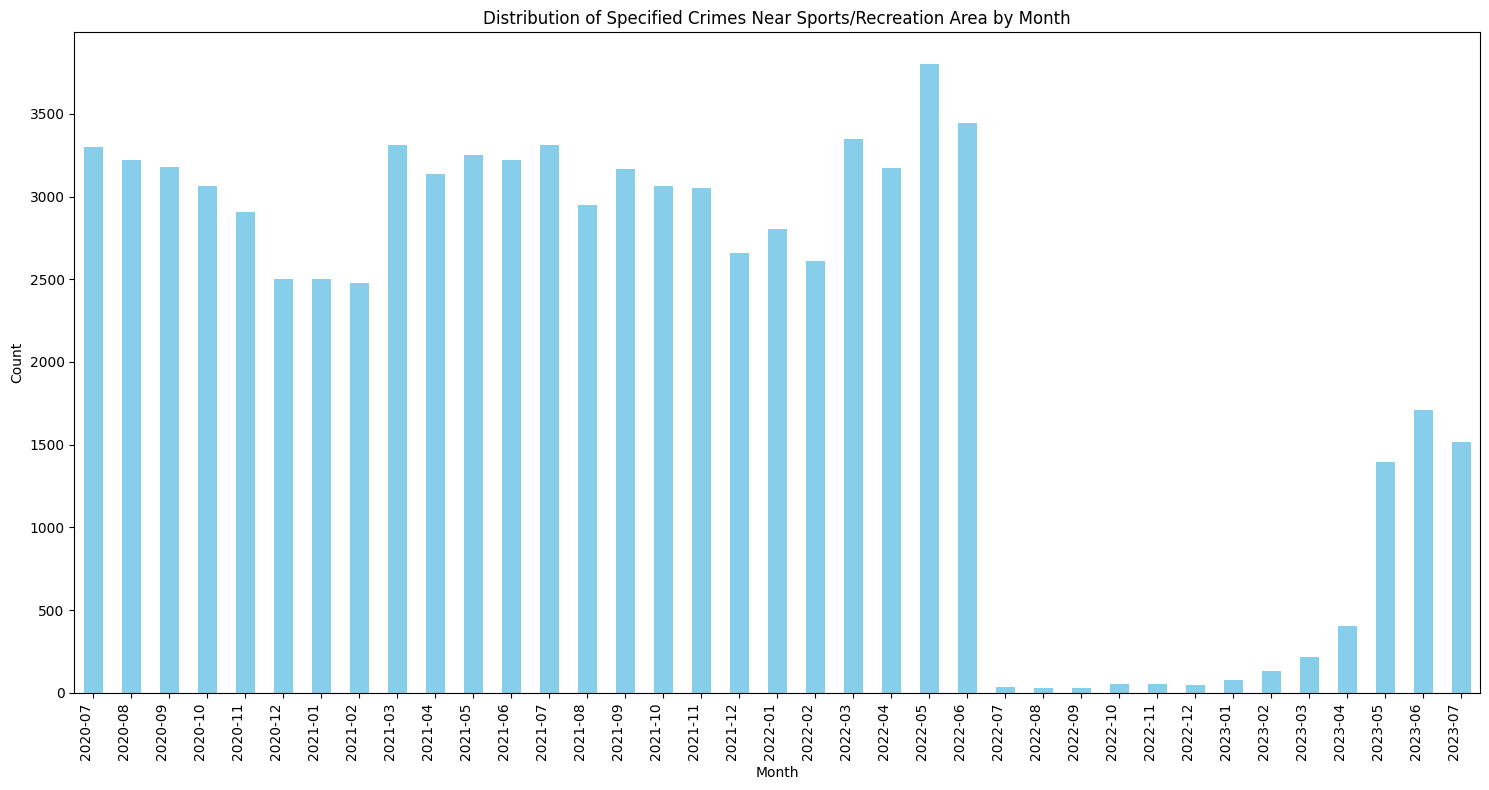

In [65]:
import matplotlib.pyplot as plt

# Get the count of incidents for each month
monthly_counts = crime_df['Month'].value_counts().sort_index()

# matplotlib plotting parameters
plt.figure(figsize=(15, 8))
bars = monthly_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Specified Crimes Near Sports/Recreation Area by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()


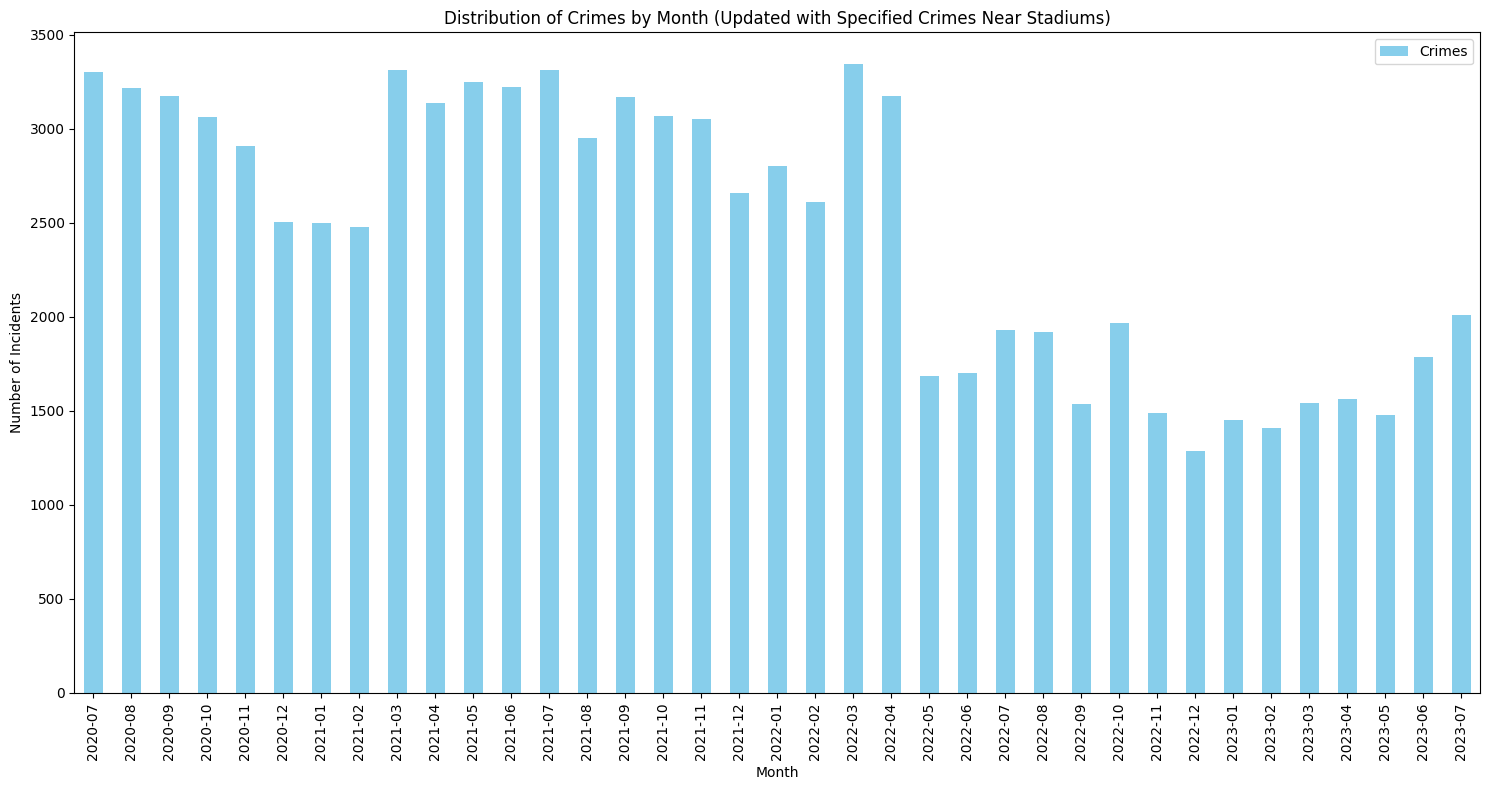

In [64]:
import matplotlib.pyplot as plt

# Get the count of incidents for each month for all crimes from the main dataset
all_crimes_monthly_counts = crime_df['Month'].value_counts().sort_index()

# Filter the lsoa_near_stadium_1mile_df for the specified crime types
filtered_df = lsoa_near_stadium_1mile_df[lsoa_near_stadium_1mile_df['Crime type'].isin(['Violence and sexual offenses', 'Drugs', 'Vehicle crime', 'Anti-social behaviour', 'Public order', 'Criminal damage and arson'])]

# Get the count of incidents for each month for the specified crime types from the filtered dataset
specific_crimes_monthly_counts = filtered_df['Month'].value_counts().sort_index()

# Update the counts in all_crimes_monthly_counts with the counts from specific_crimes_monthly_counts
all_crimes_monthly_counts.update(specific_crimes_monthly_counts)

# Plotting
plt.figure(figsize=(15, 8))

# Plot the updated counts
all_crimes_monthly_counts.plot(kind='bar', color='skyblue', label='Crimes')

plt.title('Distribution of Crimes by Month (Updated with Specified Crimes Near Stadiums)')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


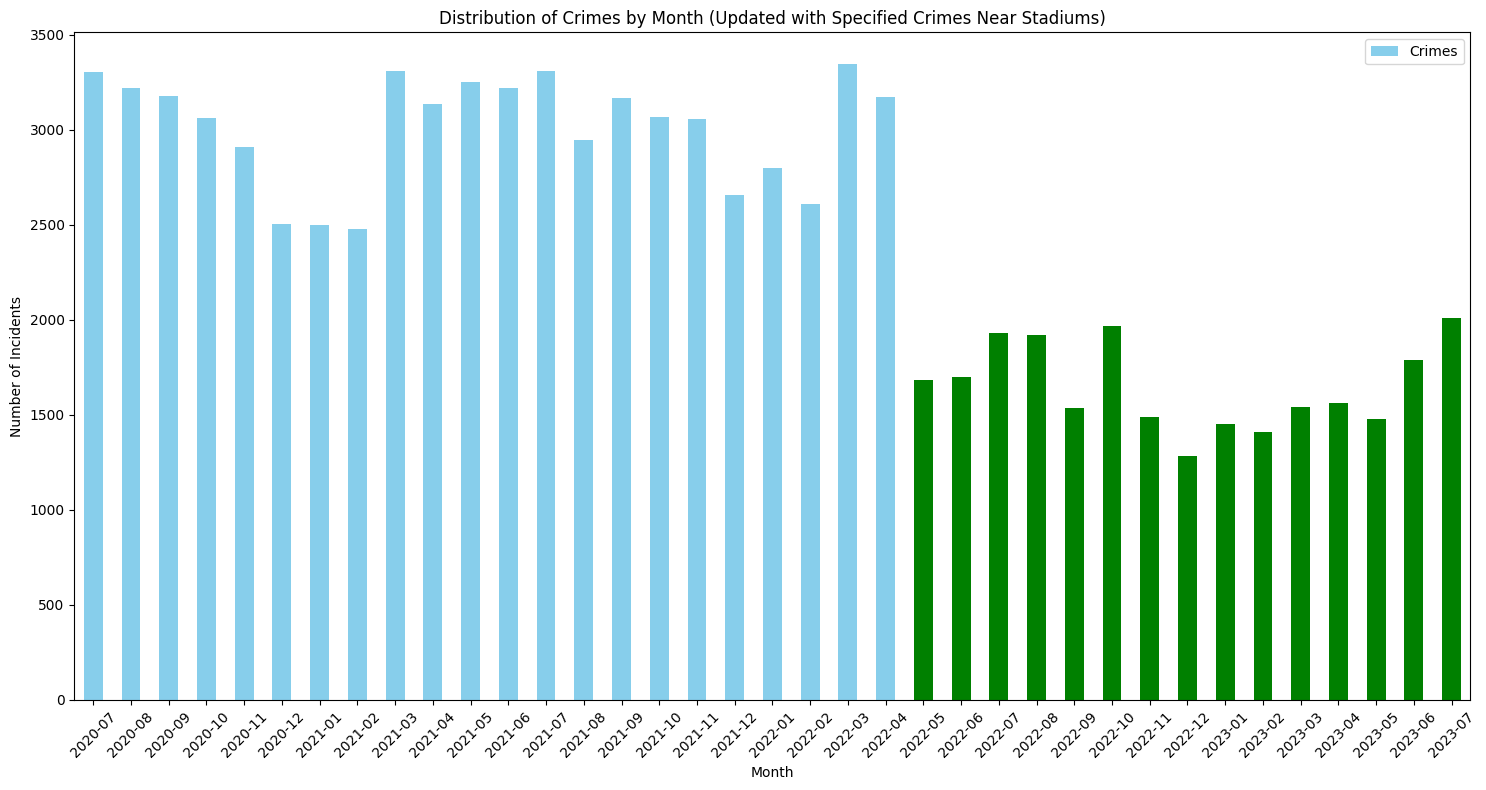

In [69]:
import matplotlib.pyplot as plt

# Get the count of incidents for each month for all crimes from the main dataset
all_crimes_monthly_counts = crime_df['Month'].value_counts().sort_index()

# Filter the lsoa_near_stadium_1mile_df for the specified crime types
filtered_df = lsoa_near_stadium_2miles_df[lsoa_near_stadium_2miles_df['Crime type'].isin(['Violence and sexual offenses', 'Drugs', 'Vehicle crime', 'Anti-social behaviour', 'Public order', 'Criminal damage and arson'])]

# Get the count of incidents for each month for the specified crime types from the filtered dataset
specific_crimes_monthly_counts = filtered_df['Month'].value_counts().sort_index()

# Update the counts in all_crimes_monthly_counts with the counts from specific_crimes_monthly_counts
all_crimes_monthly_counts.update(specific_crimes_monthly_counts)

# Determine the color for each bar
colors = ['green' if month in specific_crimes_monthly_counts.index else 'skyblue' for month in all_crimes_monthly_counts.index]

# Plotting
plt.figure(figsize=(15, 8))

# Plot the updated counts with the determined colors
all_crimes_monthly_counts.plot(kind='bar', color=colors, label='Crimes')

plt.title('Distribution of Crimes by Month (Updated with Specified Crimes Near Stadiums)')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


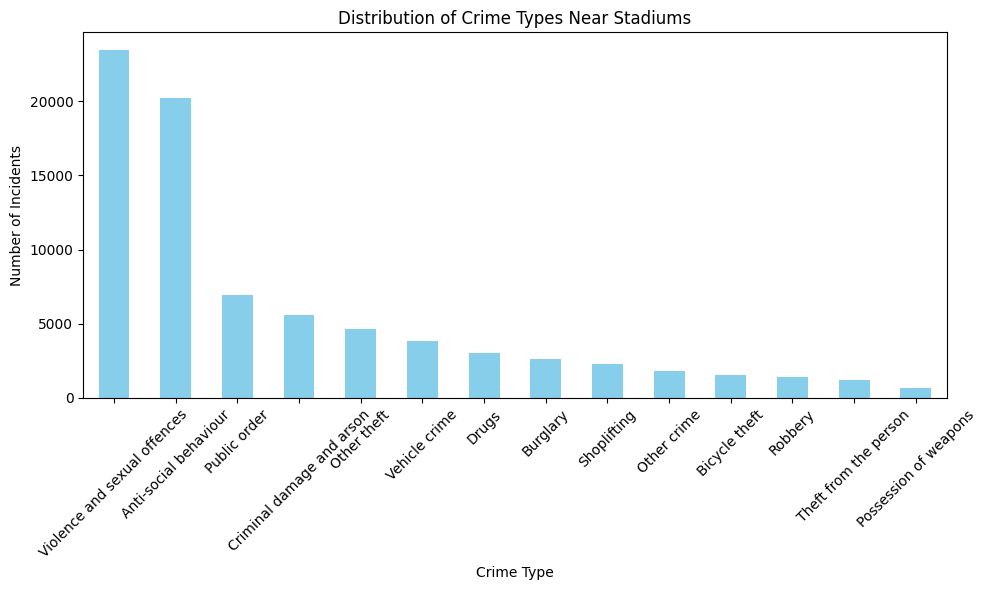

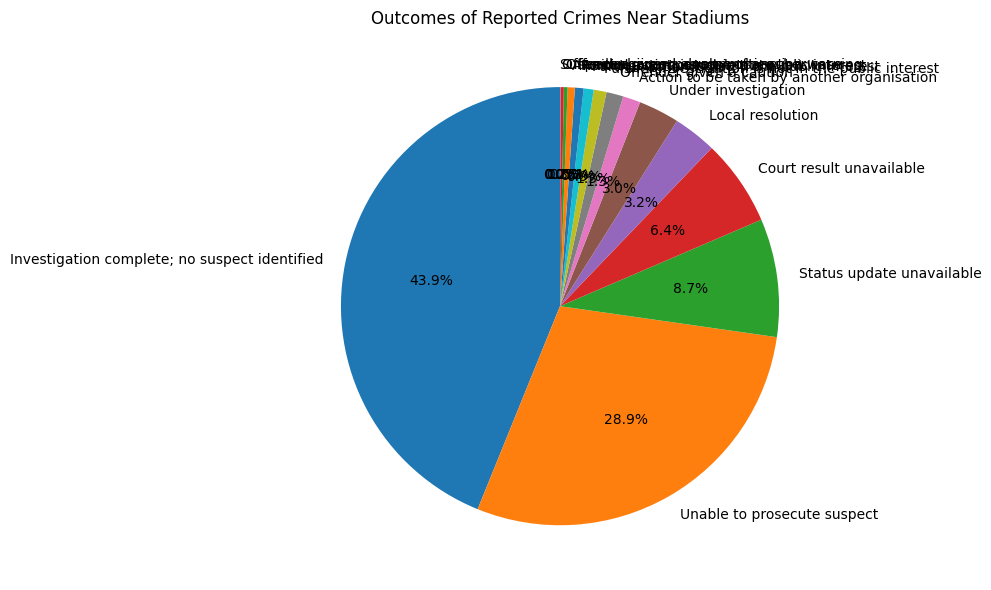

AttributeError: module 'matplotlib.pyplot' has no attribute 'tight'

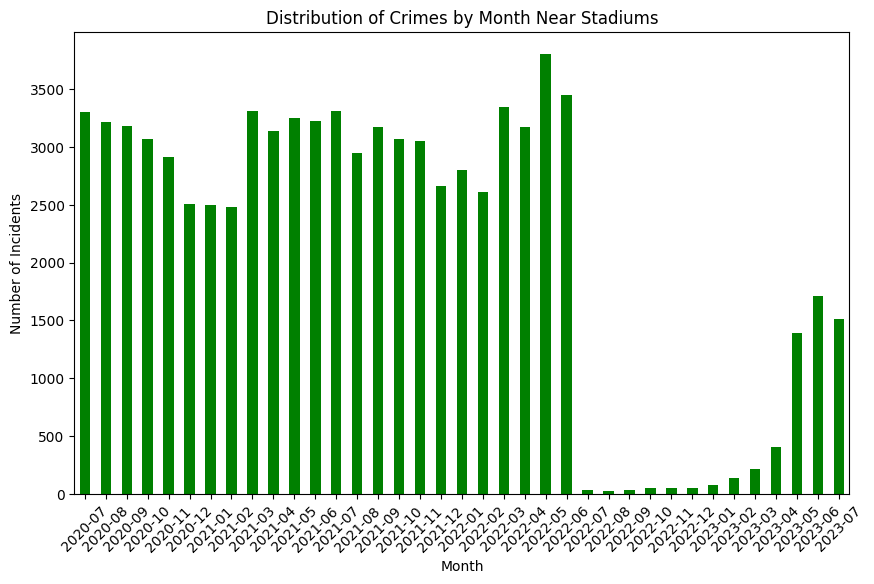

In [28]:
import matplotlib.pyplot as plt

# 1. Bar Chart of Crime Types
plt.figure(figsize=(10,6))
crime_df['Crime type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Crime Types Near Stadiums')
plt.xlabel('Crime Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Pie Chart of Last Outcome Categories
plt.figure(figsize=(10,6))
crime_df['Last outcome category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Outcomes of Reported Crimes Near Stadiums')
plt.ylabel('')  # Hide the default 'Last outcome category' ylabel
plt.tight_layout()
plt.show()

# 4. Histogram of Crimes by Month
plt.figure(figsize=(10,6))
crime_df['Month'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Distribution of Crimes by Month Near Stadiums')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight


In [ ]:
import pandas as pd

def match_stadium_to_lsoa(data):
    # Create a dictionary to store the mapping
    stadium_lsoa_mapping = {}
    
    for index, row in data.iterrows():
        stadium = row['Closest Stadium']
        lsoa_name = row['LSOA name']
        
        # Update the mapping
        stadium_lsoa_mapping[stadium] = lsoa_name
    
    return stadium_lsoa_mapping


# Apply the function
mapping = match_stadium_to_lsoa(merged_df)



{'Rodney Parade': 'Newport 018A', 'Pontypool Park': 'Torfaen 005B', 'Cwmbran Stadium': 'Torfaen 012D', 'Portman Road': 'Ipswich 016C', 'Gander Green Lane': 'Sutton 025A', 'Recreation Ground': 'Copeland 003D', 'The Runnymede Stadium': 'Runnymede 003C', 'Cherrywood Road': 'Rushmoor 002A', 'Kingfield Stadium': 'Woking 011D', 'St Lawrence Ground': 'Canterbury 017D', 'Stonebridge Road': 'Thurrock 018E', 'Crabble Athletic Ground': 'Dover 012B', 'Priestfield Stadium': 'Medway 030D', 'Pirelli Stadium': 'East Staffordshire 011H', 'Vale Park': 'Stoke-on-Trent 011D', 'Bet365 Stadium': 'Stoke-on-Trent 032D', 'Bescot Stadium': 'Walsall 037D', 'Edgar Street': 'Herefordshire 015B', 'The Valley': 'Redditch 008A', 'New Meadow': 'Shropshire 024C', 'New Bucks Head': 'Telford and Wrekin 025A', 'Sixways Stadium': 'Wychavon 006B', 'Aggborough': 'Wyre Forest 004C', 'Coventry Building Society Arena': 'Nuneaton and Bedworth 016B', 'Butlin Road': 'Rugby 009D', 'The Camrose': 'Basingstoke and Deane 014D', 'Rose 

In [ ]:
# Convert the dictionary to a DataFrame
df_mapping = pd.DataFrame(list(mapping.items()), columns=['Stadium', 'LSOA Name'])

# Save the DataFrame to a CSV file
# df_mapping.to_csv('stadium_lsoa_mapping.csv', index=False)

In [ ]:
# Extract LSOA names
lsoa_names = list(mapping.values())

# Find duplicates
duplicates = set([lsoa for lsoa in lsoa_names if lsoa_names.count(lsoa) > 1])

print(duplicates)

set()
